## Tutorial: Identificación e imputación de valores perdidos en Python

Trabajamos con el conjunto de datos Automobile, que podéis encontrar en el repositorio UCI Machine Learning. Éste dataset contiene 205 instancias con diferentes características de automóviles como el número de puertas (number-of-doors), los caballos (horsepower) o el precio (price). Cargamos el dtaset y le asignamos el nombre de cada variable:

In [1]:
import pandas as pd

# Cargamos el dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning'
                 '-databases/autos/imports-85.data', encoding = 'utf-8',
                 header = None)

# Añadimos el nombre de cada variable
df.columns = ["symboling", "normalized-losses", "make", "fuel-type", 
              "aspiration", "num-of-doors", "body-style", 
              "drive-wheels", "engine-location", "wheel-base", "length", 
              "width", "height", "curb-weight", "engine-type", 
              "num-of-cylinders", "engine-size", "fuel-system", "bore",
              "stroke", "compression-ratio", "horsepower", "peak-rpm", 
              "city-mpg", "highway-mpg", "price"]

In [2]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Le pasamos una lista de valores que queremos considerar en todas las columnas como valores perdidos mediante el parámetro na_values

In [3]:
import pandas as pd

na_values = ["?"]

# Cargamos el dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning'
                 '-databases/autos/imports-85.data', encoding = 'utf-8',
                 na_values = na_values, header = None)

# Añadimos el nombre de cada variable
df.columns = ["symboling", "normalized-losses", "make", "fuel-type", 
              "aspiration", "num-of-doors", "body-style", 
              "drive-wheels", "engine-location", "wheel-base", "length", 
              "width", "height", "curb-weight", "engine-type", 
              "num-of-cylinders", "engine-size", "fuel-system", "bore",
              "stroke", "compression-ratio", "horsepower", "peak-rpm", 
              "city-mpg", "highway-mpg", "price"]

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Identificamos el número de missing values en cada columna del dataset

In [5]:
# Identificamos el número de missing values en cada columna
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Identificamos el número de missing values en cada columna de manera visual

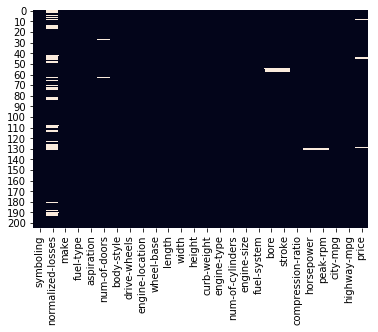

In [7]:
import seaborn as sns

# Identificamos los missing values visualmente
sns.heatmap(df.isnull(), cbar=False)

#### Eliminación de valores perdidos
Le definimos en qué columnas buscar los valores perdidos y para ello usamos el parámetro subset

In [8]:
# Eliminamos las filas con missing values en horsepower o peak-rpm
df.dropna(subset=['horsepower', 'peak-rpm'], inplace=True)

# Comprobamos que se han eliminado
print("valores perdidos en horsepower: " + 
      str(df['horsepower'].isnull().sum()))
print("valores perdidos en peak-rpm: " + 
      str(df['peak-rpm'].isnull().sum()))

valores perdidos en horsepower: 0
valores perdidos en peak-rpm: 0


#### Imputación con la media y moda
Para ello usamos la función fillna

In [9]:
# Imputamos la variable bore con la media
df['bore'].fillna(df['bore'].mean(), inplace=True)
print("valores perdidos en bore: " + 
      str(df['bore'].isnull().sum()))

# Imputamos la variable num-of-doors con la moda
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)
print("Valores perdidos en num-of-doors: " + 
      str(df['num-of-doors'].isnull().sum()))

valores perdidos en bore: 0
Valores perdidos en num-of-doors: 0


#### Imputación mediante modelo predictivo KNN
Usamos el modelo k-nearest neighbors, donde se estima el valor perdido como la media (en el caso de las variables numéricas) de los valores de los k vecinos u observaciones mas cercanos. Asimismo, para las variables categóricas, se utiliza las clase mayoritaria de entre los k mas cercanos.

In [10]:
from sklearn.impute import KNNImputer

# Construimos el modelo
imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Ajustamos el modelo e imputamos los missing values
imputer.fit(df[["normalized-losses"]])
df["normalized-losses"] = imputer.transform(df[["normalized-losses"]]).ravel()

print("Valores perdidos en normalized-losses: " + 
      str(df['normalized-losses'].isnull().sum()))

Valores perdidos en normalized-losses: 0
